In [1]:
import pandas as pd
seeds = pd.read_csv('seeds.csv', header = None)
samples = seeds.loc[:,0:6].values.reshape(210,7)
points = samples[0:150, 0:2]
new_points = samples[150:,0:2]
varieties = seeds.loc[:, 7].values

## K-MEANS

In [2]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## VISUALIZE K-MEANS

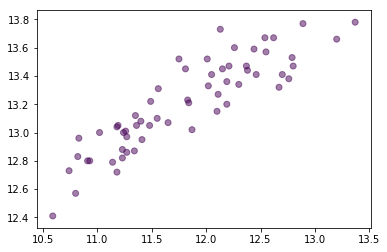

In [4]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c = labels, alpha=0.5)

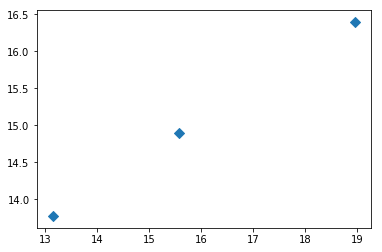

In [5]:
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s = 50)
plt.show()

## EVALUATE K-MEANS WITH NO LABEL

Inertia Measures how spread out the clusters are (lower is be!er)

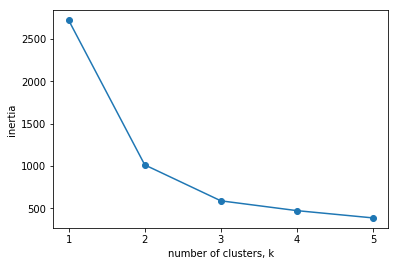

In [6]:
# Choose elbow in the inertia plot
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

=> choose 3 clusters

## EVALUATE K MEANS WITH LABEL

In [7]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


varieties   1   2   3
labels               
0          60  10   2
1           1  60   0
2           9   0  68


In [8]:
from sklearn.metrics import classification_report
classification_report(varieties, labels)

C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Thanh Thanh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         0\n           1       0.02      0.01      0.02        70\n           2       0.00      0.00      0.00        70\n           3       0.00      0.00      0.00        70\n\n   micro avg       0.00      0.00      0.00       210\n   macro avg       0.00      0.00      0.00       210\nweighted avg       0.01      0.00      0.01       210\n'

## PREPROCESSING: NORMALIZER: STOCK MOVEMENT

In [9]:
stock = pd.read_csv('stock.csv', index_col = 0)
movements = stock.values.reshape(60, 963)
companies = stock.index

In [10]:
# Import Normalizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

# Create a normalizer: normalizer
# Some stocks are more expensive than others.
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
48       0                              Toyota
45       0                                Sony
21       0                               Honda
34       0                          Mitsubishi
7        0                               Canon
46       1                      Sanofi-Aventis
37       1                            Novartis
19       1                     GlaxoSmithKline
52       1                            Unilever
6        1            British American Tobacco
32       2                                  3M
30       2                          MasterCard
58       2                               Xerox
47       2                            Symantec
23       2                                 IBM
35       2                            Navistar
20       2                          Home Depot
31       2                           McDonalds
59       2                               Yahoo
14       2                                Dell
8        2   

=> understand which company have stock prices that tend to change in the same way